Перейдём к следующему датасэту.

На Землю нападают войска жукеров, и в их флоте присутствуют транспортники, истребители и крейсеры. Для борьбы с каждым типом кораблей используется свой вид оружия. Как аналитику из Штаба Обороны, вам поручено разработать модель, предсказывающую какие корабли участвуют в атаке, чтобы успешно отбить нападения на различные области планеты

Данных удалось собрать немного, и предсказывать придётся гораздо больший по объёму массив.

Обучите модель и предскажите классы кораблей для новых поступающих данных. Укажите в ответе через пробел число крейсеров, транспортников и истребителей.

От вашего ответа зависит судьба человечества!

In [1]:
# Импортируем необходимые модули
# для работы с данными.
import pandas as pd
import numpy as np

In [2]:
# для построения леса деревьев решений и обучения моделей.
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
# для работы с графикой.
import matplotlib.pyplot as plt

In [3]:
# Считываем файл c данными о сердечных заболеваниях.
df = pd.read_csv('D:\\КУРСЫ DATA SCIENCE\\МОИ ЗАДАЧКИ\\invasion.csv')
df.head( )

,class,g_reflection,i_reflection,speed,brightness,time_of_observance,volume
0,transport,2.190672,6.716633,62.168208,0.347465,158221,44.932446
1,transport,3.453276,8.995909,62.994707,0.590094,385972,41.568300
2,transport,2.432994,6.938691,62.245807,0.329288,446482,40.123467
3,fighter,6.083763,3.019459,18.474555,0.174738,210125,11.384865
4,fighter,12.876769,2.452950,195.805771,0.150446,23109,11.328806


In [6]:
# Отбросим колонку, которую будем предсказывать.
X_train = df.drop(['class'], axis = 1)

In [7]:
y_train = df['class']

In [10]:
# Создаем модель RandomForestClassifier.
rf_df = RandomForestClassifier(random_state=0)

In [11]:
# Задаем параметры модели.
parametrs = {'n_estimators': [10, 20, 30, 40, 50], 'max_depth': [1,3,5,7,9,11], 
                        'min_samples_leaf': [1,2,3,4,5,6,7], 'min_samples_split': [2,4,6,8]}

In [12]:
# Обучение Random forest моделей GridSearchCV на подмножестве train.
GridSearchCV_inv_clf = GridSearchCV(rf_df, parametrs, cv=3, n_jobs=-1)
GridSearchCV_inv_clf.fit(X_train, y_train)


GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=0), n_jobs=-1,
             param_grid={'max_depth': [1, 3, 5, 7, 9, 11],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7],
                         'min_samples_split': [2, 4, 6, 8],
                         'n_estimators': [10, 20, 30, 40, 50]})

In [13]:
GridSearchCV_inv_clf.best_params_

{'max_depth': 3,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 10}

In [17]:
# Проведем преобразование, позволяющее определить важность переменных.
best_inv_clf = GridSearchCV_inv_clf.best_estimator_

In [31]:
# Создадим атрибут feature_importances_inv и сохраним его в отдельную переменную.
feature_importances_inv = best_inv_clf.feature_importances_

In [19]:
# Создадим DataFrame с информацией о важности переменных.
feature_importances_inv = pd.DataFrame({'feature_importances': feature_importances_inv},
                                            index=X.columns)\
    .sort_values(by='feature_importances', ascending=True)\
    .rename(columns={'feature_importances': 'importance'})

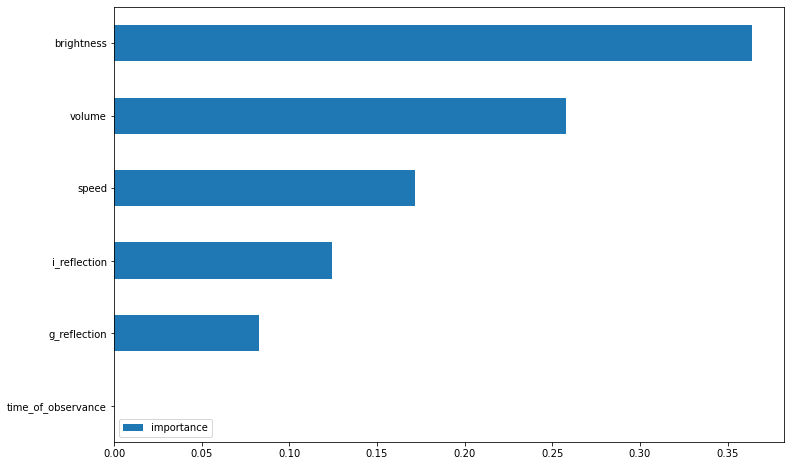

In [20]:
# Построение графика важности переменных.
feature_importances_inv.plot(kind='barh', figsize=(12, 8))
plt.show()

In [21]:
test_df = pd.read_csv('D:\\КУРСЫ DATA SCIENCE\\МОИ ЗАДАЧКИ\\operative_information.csv')
test_df.head( )

,g_reflection,i_reflection,speed,brightness,time_of_observance,volume
0,7.516543,3.916691,513.954279,0.177247,105908,13.267224
1,4.322988,6.967689,63.752970,0.545922,277855,39.833130
2,4.595724,9.098297,62.233948,0.389201,160662,42.014556
3,2.689675,7.964869,62.475495,0.541081,162092,42.056829
4,8.075576,5.169719,336.441261,0.174757,466853,11.779813


In [22]:
y_predict=best_inv_clf. predict (test_df)

pd.Series(y_predict).value_counts()

fighter      675
transport    595
cruiser      230
dtype: int64

In [29]:
feature_importances_inv.sort_values('importance', ascending=False)

,importance
brightness,0.363803
volume,0.257661
speed,0.171441
i_reflection,0.124372
g_reflection,0.082723
time_of_observance,0.000000


Вариант №2

In [30]:
# Импортируем необходимые модули
# для работы с данными:
import pandas as pd

# для построения леса деревьев решений, обучения моделей и построения confusion_matrix:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Считываем файлы c данными о войсках жукеров.
aliens_data_train = pd.read_csv('https://stepik.org/media/attachments/course/4852/invasion.csv')
aliens_data_test = pd.read_csv('https://stepik.org/media/attachments/course/4852/operative_information.csv')

# Создаем подмножества train и test.
X_train = aliens_data_train.drop(['class'], axis=1)
y_train = aliens_data_train['class']
X_test = aliens_data_test

# Конвертируем все строковые переменные в числовые.
y_train = pd.get_dummies(y_train)

# Создаем модель RandomForestClassifier.
rf = RandomForestClassifier(random_state=0)

# Задаем параметры модели.
parameters = {'n_estimators': [30], 'max_depth': [10]}

# Обучение Random forest моделей GridSearchCV для крейсеров, транспортников и истребителей.
cruiser_clf = GridSearchCV(rf, parameters, cv=5, n_jobs=-1)
cruiser_clf.fit(X_train, y_train['cruiser'])
transport_clf = GridSearchCV(rf, parameters, cv=5, n_jobs=-1)
transport_clf.fit(X_train, y_train['transport'])
fighter_clf = GridSearchCV(rf, parameters, cv=5, n_jobs=-1)
fighter_clf.fit(X_train, y_train['fighter'])

# Определение наилучших классификаторов для крейсеров, транспортников и истребителей.
cruiser_best_clf = cruiser_clf.best_estimator_
transport_best_clf = transport_clf.best_estimator_
fighter_best_clf = fighter_clf.best_estimator_

# Предсказываем классы кораблей для новых поступающих данных из второго файла,
# используя созданные наилучшие классификаторы.
cruiser_pred = cruiser_best_clf.predict(X_test)
transport_pred = transport_best_clf.predict(X_test)
fighter_pred = fighter_best_clf.predict(X_test)

# Создадим атрибут feature_importances и сохраним его в отдельные переменные.
cruiser_feature_importances = cruiser_best_clf.feature_importances_
transport_feature_importances = transport_best_clf.feature_importances_
fighter_feature_importances = fighter_best_clf.feature_importances_

# Создадим DataFrames, одна колонка - имена переменных, другая - важность переменных, отсортированные по убыванию.
cruiser_feature_importances_df = pd.DataFrame({'features': list(X_train),
                                               'feature_importances': cruiser_feature_importances})\
    .sort_values(by='feature_importances', ascending=False)
transport_feature_importances_df = pd.DataFrame({'features': list(X_train),
                                               'feature_importances': transport_feature_importances})\
    .sort_values(by='feature_importances', ascending=False)
fighter_feature_importances_df = pd.DataFrame({'features': list(X_train),
                                               'feature_importances': fighter_feature_importances})\
    .sort_values(by='feature_importances', ascending=False)

print('Посмотрим Data Frames важности переменных')
print('для крейсеров:')
print(cruiser_feature_importances_df.head(3))
print()
print('для транспортников:')
print(transport_feature_importances_df.head(3))
print()
print('для истребителей:')
print(fighter_feature_importances_df.head(3))
print()

Посмотрим Data Frames важности переменных
для крейсеров:
       features  feature_importances
5        volume             0.566380
3    brightness             0.191031
1  i_reflection             0.141541

для транспортников:
       features  feature_importances
2         speed             0.340438
0  g_reflection             0.336421
3    brightness             0.135651

для истребителей:
       features  feature_importances
3    brightness             0.406664
5        volume             0.323702
1  i_reflection             0.187584

